<a href="https://colab.research.google.com/github/JiHoonMin/python/blob/main/linear_model_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import numpy.random as rnd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def plot_generated_data(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()
    

    

def plot_polynomial_regression(poly_features, lin_reg):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg.predict(X_new_poly)
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([-3, 3, 0, 10])
    plt.show()

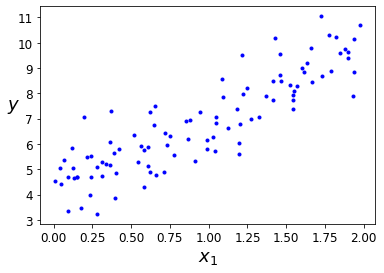

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]
plot_generated_data(X,y)

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

print(theta)

[[4.21509616]
 [2.77011339]]


In [ ]:
def plot_gradient_descent(theta, eta, theta_path=None):
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

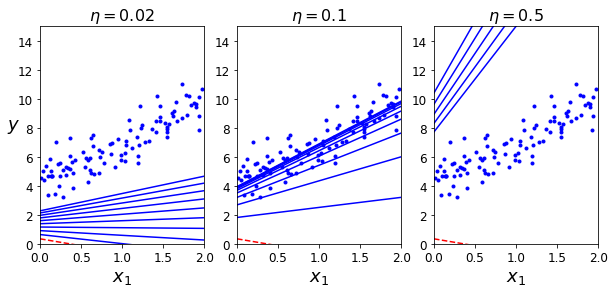

In [ ]:
theta = np.random.randn(2,1) #random intializtion

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation = 0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [ ]:
m = len(X_b) # number of traing samples

n_epochs = 50

t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

  theta = np.random.randn(2,1) # random initializtion

  for epoch in range(n_epochs):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      eta = learning_schedule(epoch * m + i)
      theta = theta - eta * gradients
print(theta)

[[4.15920149]
 [2.70822291]]


In [ ]:
def plot_stochastic_gradient_descent(X, y):
    X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

    m = len(X_b)
    n_epochs = 50
    
    theta = np.random.randn(2,1)  # random initialization

    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:                    # not shown in the book
                y_predict = X_new_b.dot(theta)           # not shown
                style = "b-" if i > 0 else "r--"         # not shown
                plt.plot(X_new, y_predict, style)        # not shown
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

    plt.plot(X, y, "b.")                                 # not shown
    plt.xlabel("$x_1$", fontsize=18)                     # not shown
    plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
    plt.axis([0, 2, 0, 15])                              # not shown
    plt.show()                                           # not shown
    

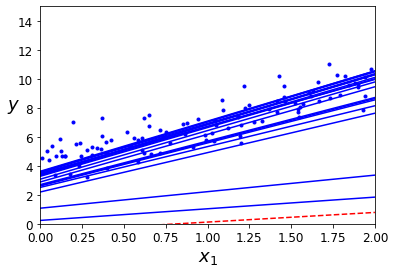

In [ ]:
plot_stochastic_gradient_descent(X,y)

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty = None,eta0=0.1,random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

In [ ]:
n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2,1) # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t +t1)

t=0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0,m,minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
print(theta)

[[4.15920149]
 [2.70822291]]


# QUESTION 1

In [ ]:
np.random.seed(42)
X = 5 * np.random.rand(100,1)
y= 20+ 9 *X + np.random.rand(100,1)*3
X_b = np.c_[np.ones((100,1)),X]

In [ ]:
np.random.seed(42)
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

print(theta)

[[21.45968787]
 [ 9.00544635]]


In [ ]:
np.random.seed(42)
eta= 0.2
n_iterations= 100
m=100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

print(theta)

[[-2.35490402e+38]
 [-7.47084698e+38]]


## QUESTION 2

In [ ]:
n_iterations = 50
minibatch_size = 20

theta = np.random.randn(2,1) # random initialization

t0, t1 = 200, 1000

def learning_schedule(t):
  n = epoch//10
  return 0.1 *2**(-n)

t=0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0,m,minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
print(theta)

[[21.4498059 ]
 [ 9.01364193]]
